In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from collections import defaultdict

%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
project_directory = os.path.dirname(os.getcwd())
path_to_data = os.path.join(project_directory, "data")
path_to_data_info = os.path.join(path_to_data, "data_description.txt")

path_to_train_data = os.path.join(path_to_data, "train.csv")
path_to_test_data = os.path.join(path_to_data, "test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
line_reader = read_file(path_to_data_info)
for line in line_reader:
    print(line)

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Res

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
def map_feature_text_file_to_dict(feature: str):
    """
    This function will read categorical variable file where
    each line in the file will have the format of variable - meaning.

    Suppose variable is Type of Sale

    File will contain
        WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash

    The returned dict will be like the following:

    dict["WD"] = "Warranty Deed - Conventional"
    dict["CWD"] = "Warranty Deed - Cash"

    """
    path_to_feature_dict_mapping = os.path.join(
        project_directory, "notebooks", "dict_mapping_features"
    )
    file_name = os.path.join(path_to_feature_dict_mapping, f"{feature}.txt")

    if not os.path.exists(file_name):
        raise FileNotFoundError(
            f"Your {feature}.txt file is not located in the dict_mapping directory!"
        )

    line_reader = read_file(file_name)
    feature_dict = defaultdict(str)
    for line in line_reader:
        line_split = line.strip().split()
        feature_dict[line_split[0]] = " ".join(line_split)[1:]
    return feature_dict

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
train_df = pd.read_csv(path_to_train_data)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

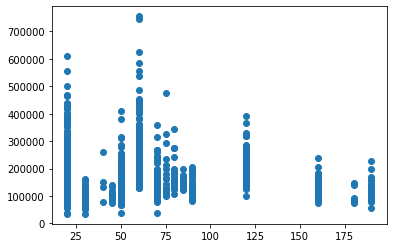

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
plt.scatter(x=train_df["MSSubClass"], y=train_df["SalePrice"])
plt.show()

In [39]:
MSSubClass_dict = defaultdict(str)
MSSubClass_dict[20] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[30] = "1-STORY 1945 & OLDER"
MSSubClass_dict[40] = "1-STORY W/FINISHED ATTIC ALL AGES"
MSSubClass_dict[45] = "STORY - UNFINISHED ALL AGES"
MSSubClass_dict[50] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[60] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[70] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[75] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[80] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[85] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[90] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[120] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[150] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[160] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[180] = "1-STORY 1946 & NEWER ALL STYLES"
MSSubClass_dict[190] = "1-STORY 1946 & NEWER ALL STYLES"

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
MSSubClass_dict = map_feature_text_file_to_dict("MSSubClass")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
MSSubClass_dict

defaultdict(str,
            {'20': '0 1-STORY 1946 & NEWER ALL STYLES',
             '30': '0 1-STORY 1945 & OLDER',
             '40': '0 1-STORY W/FINISHED ATTIC ALL AGES',
             '45': '5 1-1/2 STORY - UNFINISHED ALL AGES',
             '50': '0 1-1/2 STORY FINISHED ALL AGES',
             '60': '0 2-STORY 1946 & NEWER',
             '70': '0 2-STORY 1945 & OLDER',
             '75': '5 2-1/2 STORY ALL AGES',
             '80': '0 SPLIT OR MULTI-LEVEL',
             '85': '5 SPLIT FOYER',
             '90': '0 DUPLEX - ALL STYLES AND AGES',
             '120': '20 1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
             '150': '50 1-1/2 STORY PUD - ALL AGES',
             '160': '60 2-STORY PUD - 1946 & NEWER',
             '180': '80 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
             '190': '90 2 FAMILY CONVERSION - ALL STYLES AND AGES'})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
train_df["MSSubClass"]

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>